In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
#Pre-processing

df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [4]:
#Statistical Measures

print(df.describe().T[['mean','std','25%','50%','75%','max','min']].round(3))

                mean        std      25%      50%       75%       max     min
Price      10730.825   3626.965   8450.0   9900.0  11950.00   32500.0  4350.0
Age_08_04     55.947     18.600     44.0     61.0     70.00      80.0     1.0
KM         68533.260  37506.449  43000.0  63389.5  87020.75  243000.0     1.0
HP           101.502     14.981     90.0    110.0    110.00     192.0    69.0
Automatic      0.056      0.229      0.0      0.0      0.00       1.0     0.0
cc          1576.856    424.387   1400.0   1600.0   1600.00   16000.0  1300.0
Doors          4.033      0.953      3.0      4.0      5.00       5.0     2.0
Cylinders      4.000      0.000      4.0      4.0      4.00       4.0     4.0
Gears          5.026      0.189      5.0      5.0      5.00       6.0     3.0
Weight      1072.460     52.641   1040.0   1070.0   1085.00    1615.0  1000.0


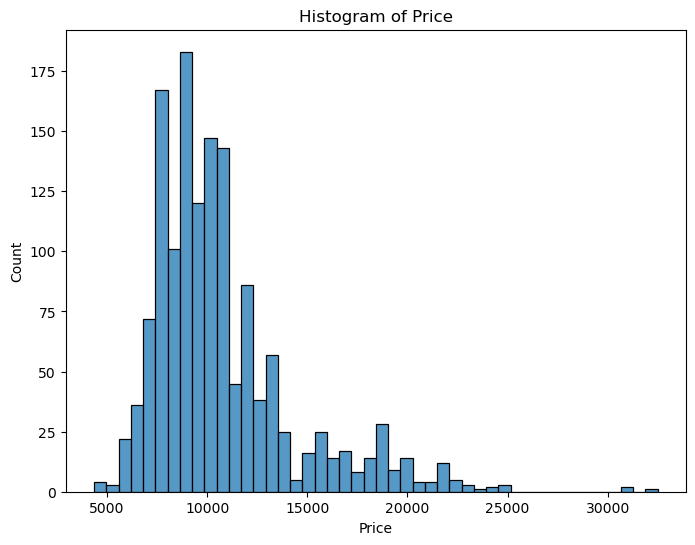

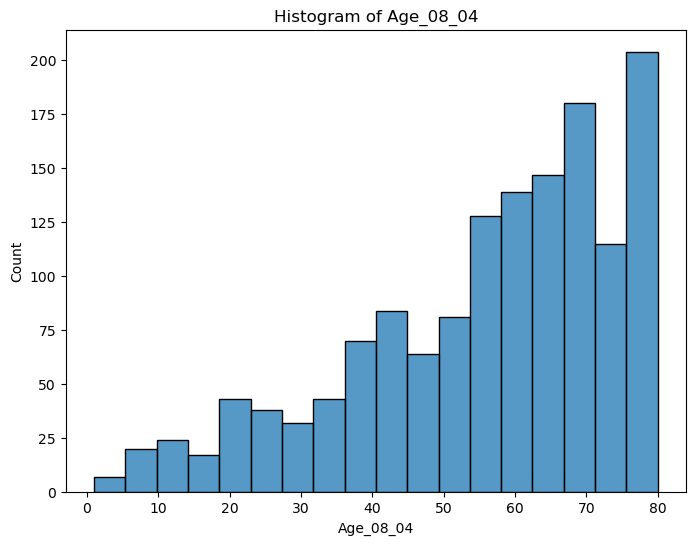

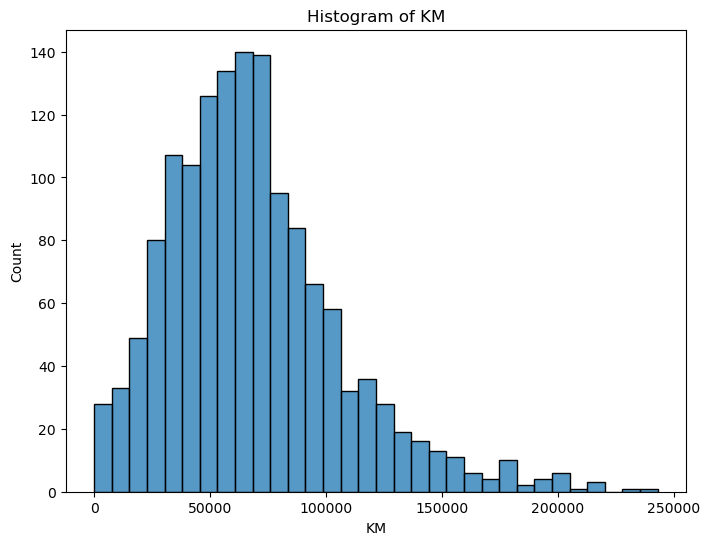

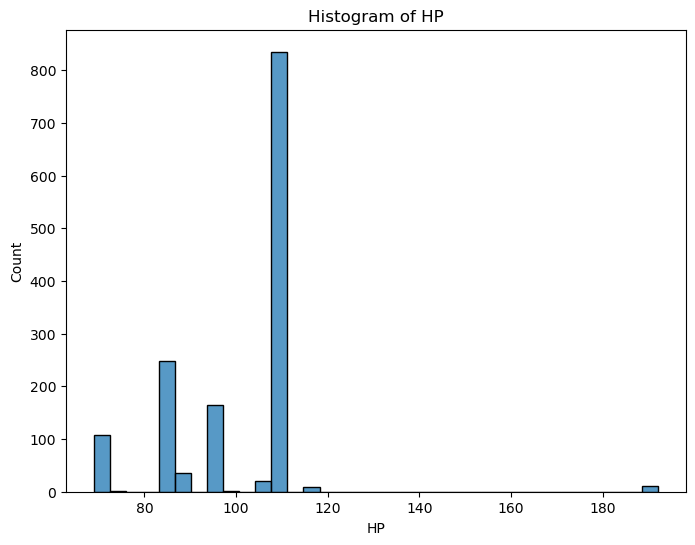

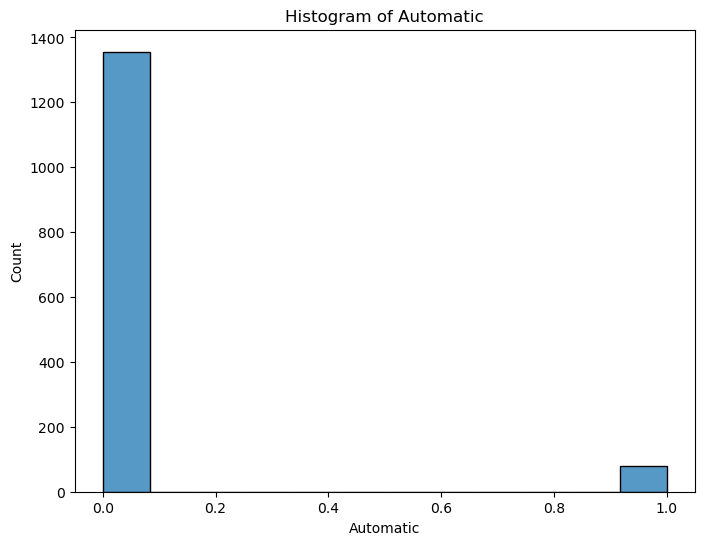

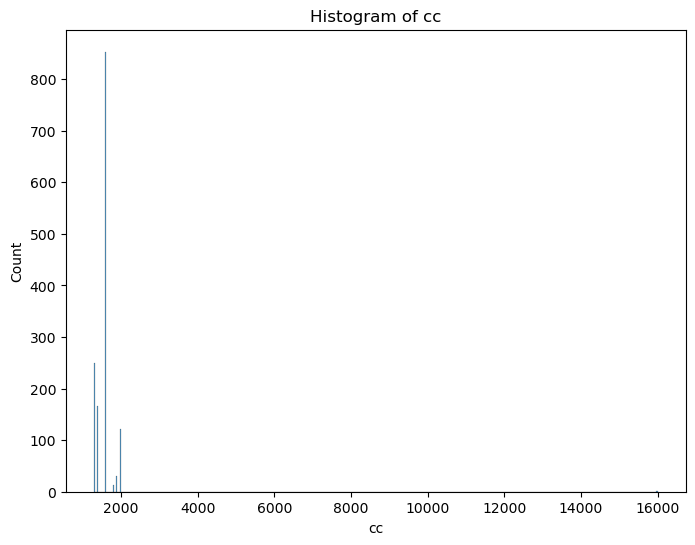

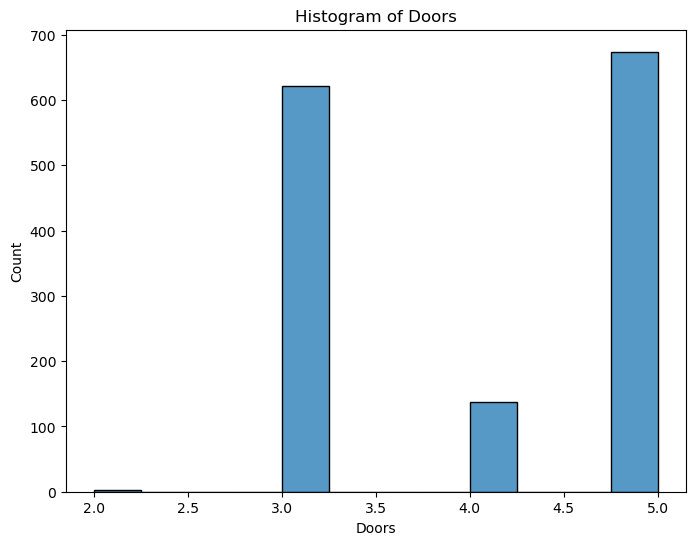

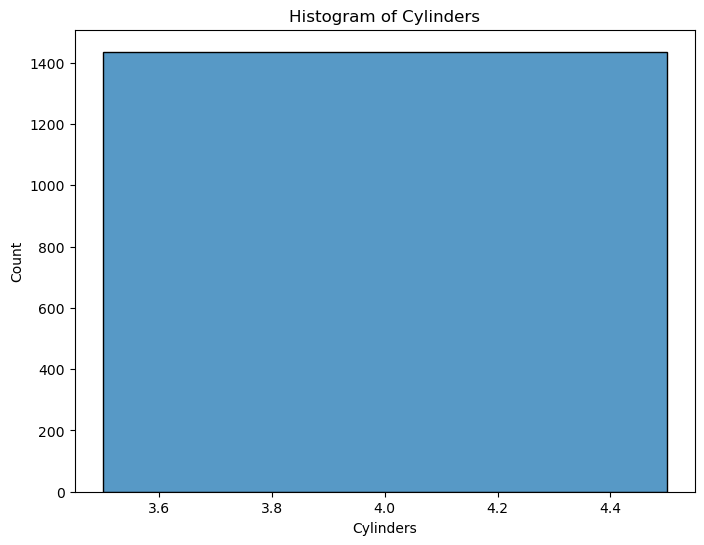

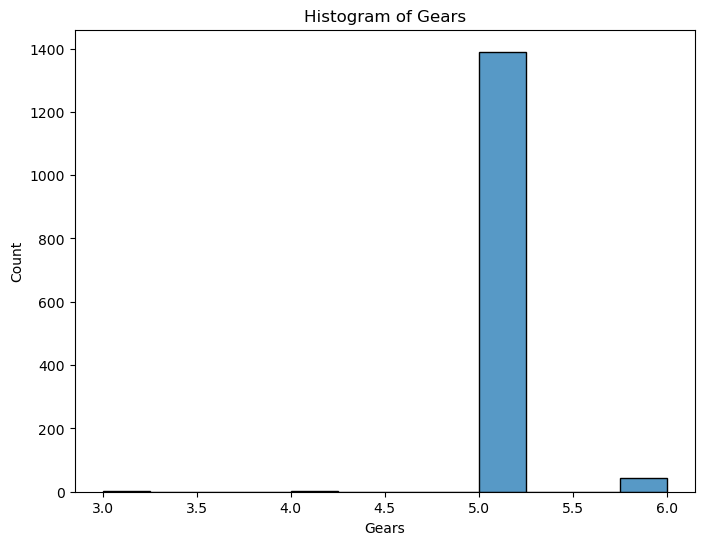

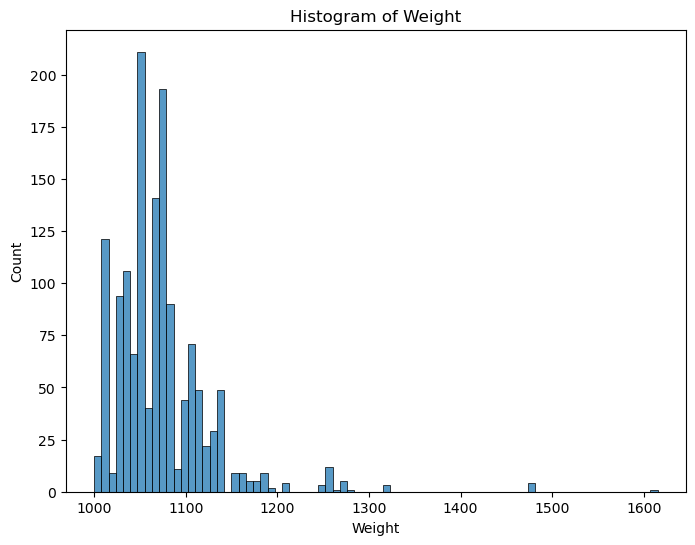

In [5]:
#Data Visualization
#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of each column using histograms
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()


In [6]:
# #data transformation

# #applying log transformation on highly skewed data variables

# #for right-skewed data
# columns_to_log = ['cc','Weight','HP','Price']  # Replace with your actual columns
# for col in columns_to_log:
#     df[col] = np.log1p(df[col])
# #for left-skewd data
# df['Age_08_04'] = np.log1p(df['Age_08_04'].max() - df['Age_08_04'])

In [7]:
# #Histogram

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Visualize distribution of each column using histograms
# for col in df.select_dtypes(include=['number']).columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df[col])
#     plt.title(f"Histogram of {col}")
#     plt.show()



#after applying log transformation
#print(df.head())

In [8]:
# dATA TRANSFORMTION

#label-encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() 

#0- CNG, 1- Diesel, 2 - Petrol
df["Fuel_Type"] = LE.fit_transform(df["Fuel_Type"])

#standardizing the data

cols_to_scale = ['Price', 'Age_08_04', 'KM','HP','cc','Weight']

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for col in cols_to_scale:
    df[col] = SS.fit_transform(df[[col]])

df.head()

# df_standardized = pd.DataFrame(SS_X, columns=[col for col in cols_to_scale])
# X_new = df_standardized

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,1,-0.768042,0,0.997419,3,4,5,1.758561
1,0.832715,-1.771966,0.117454,1,-0.768042,0,0.997419,3,4,5,1.758561
2,0.887877,-1.718184,-0.715386,1,-0.768042,0,0.997419,3,4,5,1.758561
3,1.163685,-1.610620,-0.547650,1,-0.768042,0,0.997419,3,4,5,1.758561
4,0.832715,-1.395491,-0.801028,1,-0.768042,0,0.997419,3,4,5,1.853577


In [9]:
X_new = df.iloc[:,1:]
X_new

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,1,-0.768042,0,0.997419,3,4,5,1.758561
1,-1.771966,0.117454,1,-0.768042,0,0.997419,3,4,5,1.758561
2,-1.718184,-0.715386,1,-0.768042,0,0.997419,3,4,5,1.758561
3,-1.610620,-0.547650,1,-0.768042,0,0.997419,3,4,5,1.758561
4,-1.395491,-0.801028,1,-0.768042,0,0.997419,3,4,5,1.853577
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,2,-1.035138,0,-0.652594,3,4,5,-0.901883
1432,0.863362,-1.321120,2,-1.035138,0,-0.652594,3,4,5,-1.091915
1433,0.809579,-1.374036,2,-1.035138,0,-0.652594,3,4,5,-1.091915
1434,0.755797,-1.376703,2,-1.035138,0,-0.652594,3,4,5,-1.091915


In [10]:
Y = df['Price']
Y

0       0.763763
1       0.832715
2       0.887877
3       1.163685
4       0.832715
          ...   
1431   -0.891089
1432    0.031491
1433   -0.615281
1434   -0.960042
1435   -1.042784
Name: Price, Length: 1436, dtype: float64

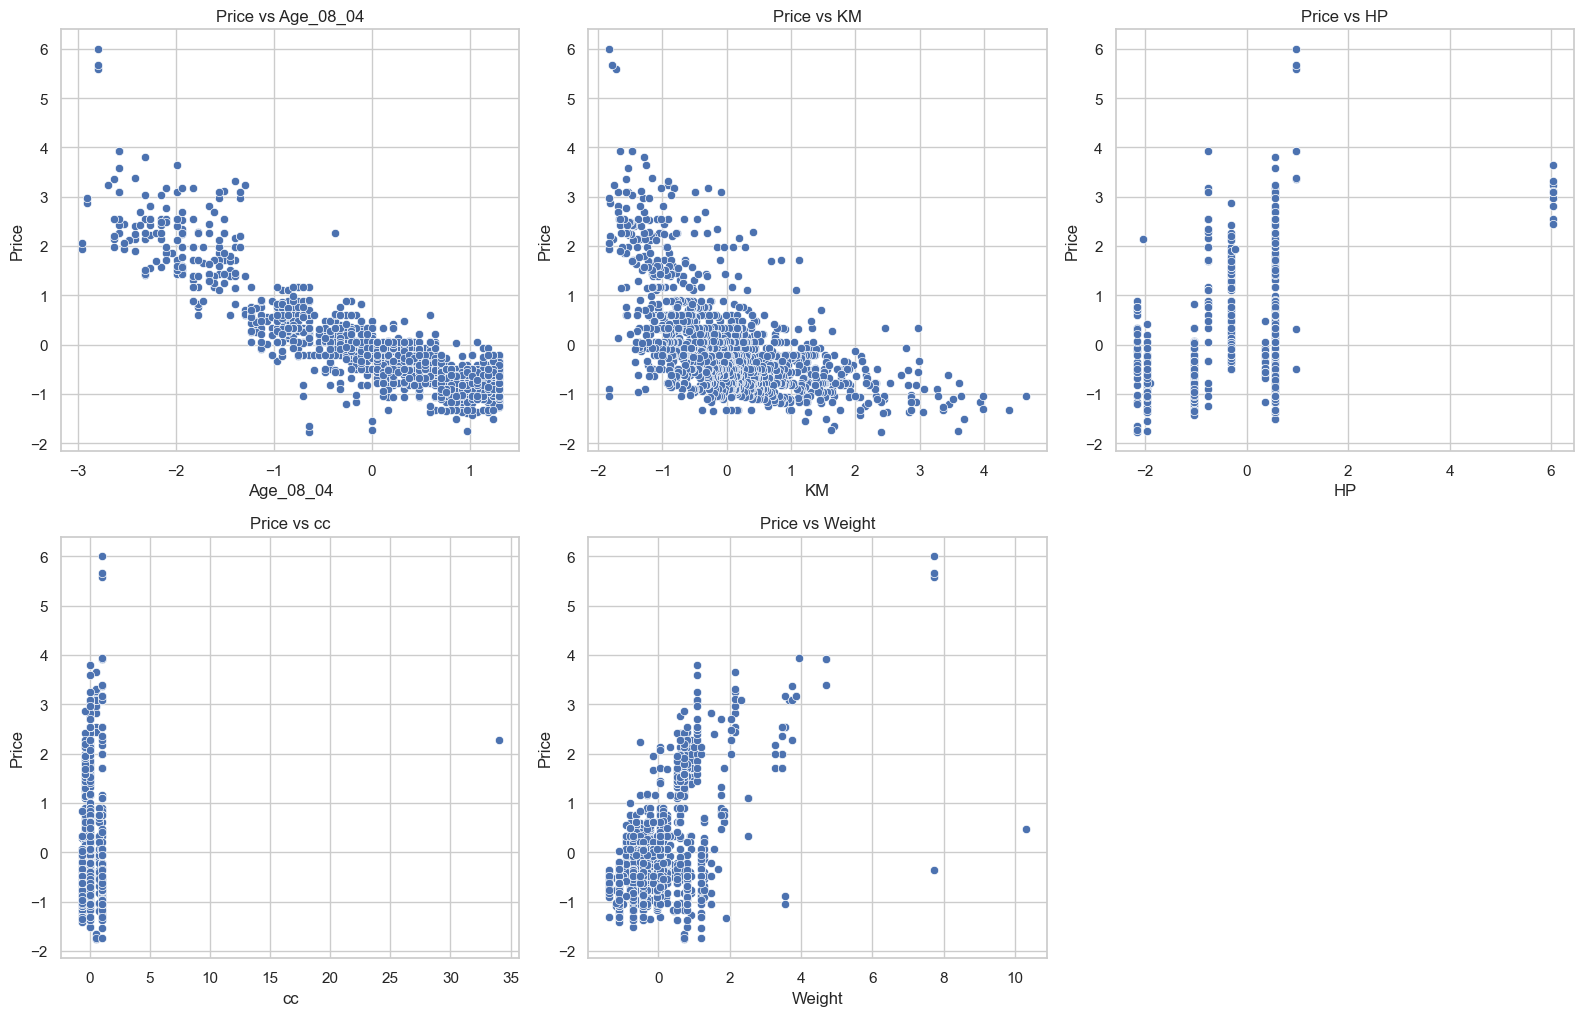

In [11]:
#plotting Scatter plot between dependent variables  and independent variables

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# List of numeric independent variables
numeric_vars = ['Age_08_04', 'KM', 'HP',  'cc', 'Weight']

# Plot scatter plots
for i, var in enumerate(numeric_vars):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=X_new[var], y=Y)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#Age_08_04 has most positve linear relationship than other variables
#KM has more negative linear relationship with the Price variable

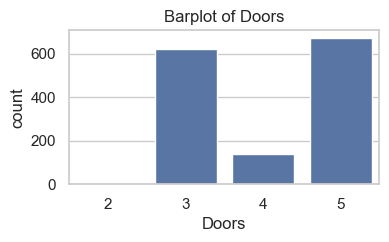

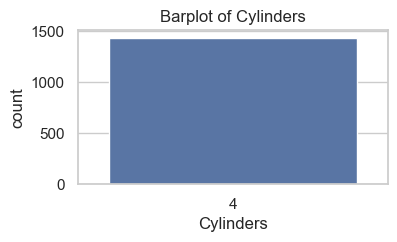

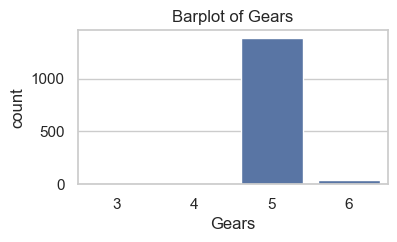

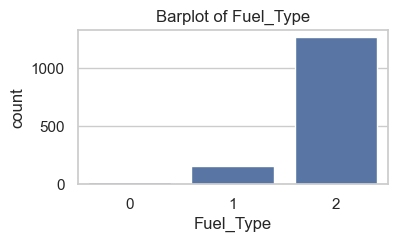

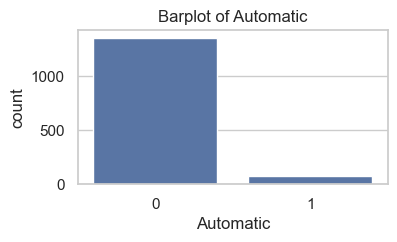

In [12]:
#barplot
cat_col = ['Doors',	'Cylinders','Gears', 'Fuel_Type','Automatic']
for col in cat_col:
    plt.figure(figsize=(4, 2))
    sns.countplot(x = X_new[col])
    plt.title(f"Barplot of {col}")
    plt.show()

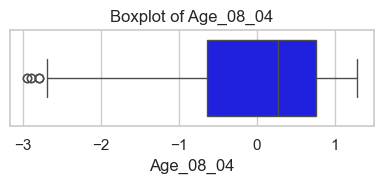

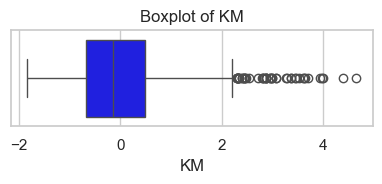

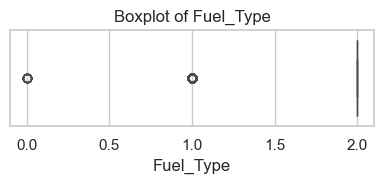

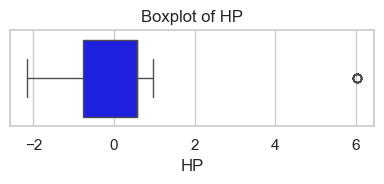

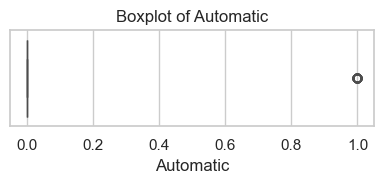

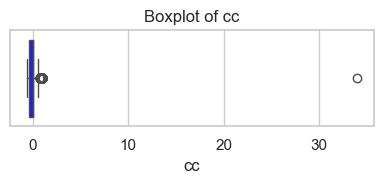

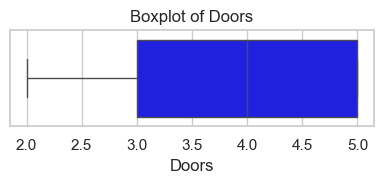

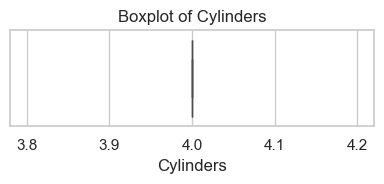

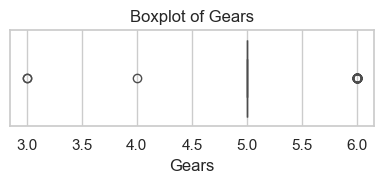

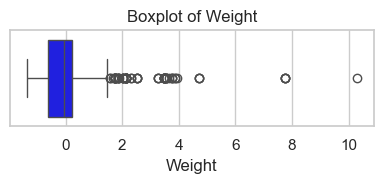

In [13]:
#boxplots

# Plot boxplots
for col in X_new.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=X_new[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [14]:
#detecting outliers and removing the outliers
outlierss = []
def detect_outliers_iqr(X_new1):
    outlier_dict = {}
    numeric_cols = X_new1.columns

    for col in numeric_cols:
        Q1 = X_new1[col].quantile(0.25)
        Q3 = X_new1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = X_new1[(X_new1[col] < lower_bound) | (X_new1[col] > upper_bound)]
        outlierss.append(outliers)
        outlier_dict[col] = outliers.shape[0]
        print(f"{col}: {outliers.shape[0]} outliers detected")

    return outlier_dict

# Run the function
outliers_found = detect_outliers_iqr(X_new)

Age_08_04: 7 outliers detected
KM: 49 outliers detected
Fuel_Type: 172 outliers detected
HP: 11 outliers detected
Automatic: 80 outliers detected
cc: 153 outliers detected
Doors: 0 outliers detected
Cylinders: 0 outliers detected
Gears: 46 outliers detected
Weight: 66 outliers detected


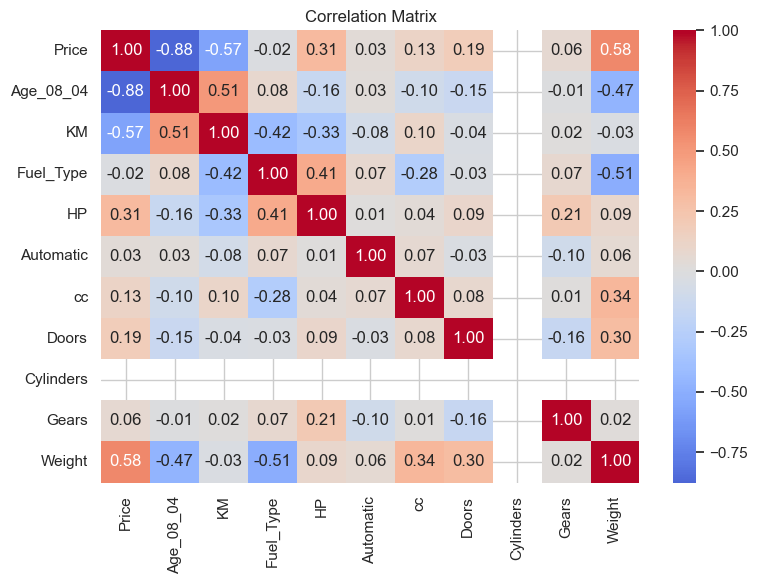

In [15]:
# Correlation heatmap of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#Age_08_04 has highest corelation

#Cylinders has no relationship so we can remove this variable

In [16]:
#Data Partition

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test   = train_test_split(X_new,Y,test_size=0.20)

In [48]:
# Model fitting
from sklearn.linear_model import LinearRegression,RANSACRegressor
#model = RANSACRegressor(LinearRegression())
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [49]:
#Model Evaluation

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error
score1 = r2_score(Y_train,Y_pred_train)
print("Training R-Squared:", np.round(score1,2))

score2 = r2_score(Y_test,Y_pred_test)
print("Test R-Squared:", np.round(score2,2))

rmse = root_mean_squared_error(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)

print("RMSE:", np.round(rmse,2))
print("MAE:", np.round(mae,2))

Training R-Squared: 0.87
Test R-Squared: 0.85
RMSE: 0.37
MAE: 0.27


In [50]:
#Model 1
X = X_new[["Age_08_04"]]

In [71]:
#Cross Validation

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    adj_r2_1 = adjusted_r2(Y_test, Y_pred_test, n=len(Y_test), p=X_train.shape[1])
    training_acc.append(r2_score(Y_train,Y_pred_train))
    test_acc.append(r2_score(Y_test,Y_pred_test))
    
print("Cross validation: Training R-Squared:",np.round(np.mean(training_acc),2))
print("Cross validation: Test R-Squared:",np.round(np.mean(test_acc),2))

Cross validation: Training R-Squared: 0.77
Cross validation: Test R-Squared: 0.76


In [52]:
#model 2
X1 = X_new[["Age_08_04",'Weight']]

In [70]:
#Cross Validation

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test= train_test_split(X1,Y,test_size=0.25,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    adj_r2_2 = adjusted_r2(Y_test, Y_pred_test, n=len(Y_test), p=X_train.shape[1])
    training_acc.append(r2_score(Y_train,Y_pred_train))
    test_acc.append(r2_score(Y_test,Y_pred_test))
    
print("Cross validation: Training R-Squared:",np.round(np.mean(training_acc),2))
print("Cross validation: Test R-Squared:",np.round(np.mean(test_acc),2))

Cross validation: Training R-Squared: 0.81
Cross validation: Test R-Squared: 0.8


In [54]:
#model3 
X2 = X_new[["Age_08_04","KM","Weight"]]


In [69]:
#Cross Validation

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test= train_test_split(X2,Y,test_size=0.25,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    adj_r2_3 = adjusted_r2(Y_test, Y_pred_test, n=len(Y_test), p=X_train.shape[1])
    training_acc.append(r2_score(Y_train,Y_pred_train))
    test_acc.append(r2_score(Y_test,Y_pred_test))
    
print("Cross validation: Training R-Squared:",np.round(np.mean(training_acc),2))
print("Cross validation: Test R-Squared:",np.round(np.mean(test_acc),2))

Cross validation: Training R-Squared: 0.85
Cross validation: Test R-Squared: 0.84


In [56]:
#Ridge Regression
from sklearn.linear_model import Ridge

# Fit Ridge regression model
ridge = Ridge(alpha=1)  # Try other values like 0.1, 10, etc.
ridge.fit(X_train,Y_train)

print(ridge.coef_)

[-0.60146993 -0.26508349  0.30483451]


In [57]:
d1 = pd.DataFrame(list(X_train))
d2 = pd.DataFrame(ridge.coef_)
pd.concat([d1,d2],axis=1)

,0,0
0,Age_08_04,-0.601470
1,KM,-0.265083
2,Weight,0.304835


In [58]:
#Lasso Regression

from sklearn.linear_model import Lasso

# Initialize and train the Lasso regression model with alpha=0.01
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, Y_train)

print(lasso_model.coef_)

# Make predictions on the training and testing sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate R-squared scores for Lasso
train_r2_lasso = r2_score(Y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(Y_test, y_test_pred_lasso)

print(f"Lasso Regression - Training R-squared: {train_r2_lasso}")
print(f"Lasso Regression - Testing R-squared: {test_r2_lasso}")



[-0.60167291 -0.25544807  0.29516815]
Lasso Regression - Training R-squared: 0.8465582402666826
Lasso Regression - Testing R-squared: 0.8513785242355307


In [59]:
d1 = pd.DataFrame(list(X_train))
d2 = pd.DataFrame(lasso_model.coef_)
pd.concat([d1,d2],axis=1)

,0,0
0,Age_08_04,-0.601673
1,KM,-0.255448
2,Weight,0.295168


In [46]:
#After applying lasso and ridge regression ['Cylinders','Doors','cc','Gears','Automatic'] are unnecessary x- variables so 
#we can remove those variables 
# X_new.drop(columns=['Cylinders','Doors','cc','Gears','Automatic'],inplace=True)

In [60]:
#Cross Validation
#model4
#X_new = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Weight']


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test= train_test_split(X_new,Y,test_size=0.25,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    adj_r2_4 = adjusted_r2(Y_test, Y_pred_test, n=len(Y_test), p=X_train.shape[1])
    training_acc.append(r2_score(Y_train,Y_pred_train))
    test_acc.append(r2_score(Y_test,Y_pred_test))
    
print("Cross validation: Training R-Squared:",np.round(np.mean(training_acc),2))
print("Cross validation: Test R-Squared:",np.round(np.mean(test_acc),2))

Cross validation: Training R-Squared: 0.86
Cross validation: Test R-Squared: 0.85


In [76]:
# Multicollinearity

x = df[['Age_08_04']]
y = df[["KM"]]

# Model fitting
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
df["Y_pred"] = model.predict(X)
r2 = r2_score(Y,df["Y_pred"])
VIF = 1 / (1- r2)
print("VIF:", VIF)

#Multicollinearity is an issue exists between two x-variables
#if two x-variables are highly co-related that with y-variable, then multicollinearity exists
#VIF is a technique that determines if multicollinearity exists or not.
#VIF<5- No multicollinearity
#5< VIF < 10 - multicollinearity exists, Model is acceptable
#VIF>10 - Model cannot be acceptable

VIF: 0.4668012775290761


In [75]:
x = df[['Age_08_04']]
y = df[["HP"]]

# Model fitting
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
df["Y_pred"] = model.predict(X)
r2 = r2_score(Y,df["Y_pred"])
VIF = 1 / (1- r2)
print("VIF:", VIF)

VIF: 1.3334334143641935


In [61]:
adj_r2_1= 0
adj_r2_2= 0
adj_r2_3= 0
adj_r2_4= 0

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


In [73]:
print("Model 1 Adjusted R²:", np.round(np.mean(adj_r2_1),2))
print("Model 2 Adjusted R²:", np.round(np.mean(adj_r2_2),2))
print("Model 3 Adjusted R²:", np.round(np.mean(adj_r2_3),2))
print("Model 4 Adjusted R²:", np.round(np.mean(adj_r2_4),2))

Model 1 Adjusted R²: 0.78
Model 2 Adjusted R²: 0.82
Model 3 Adjusted R²: 0.85
Model 4 Adjusted R²: 0.85


In [74]:
#conclusion

#By Evaluating the 4 model metrics, Model 3 is the best model because by only 3 X-variables it gives almost same accuracy as all X-variables

In [75]:
#Explanation

#First step was data preprocessing which i have checked any missing values and invalid values are there

#Then EDA to show the distribution of each numeric variable, helping identify skewness or outliers. and to find out target variable.
#Corelation matrix heatmap and Scatter plot has been plotted to understand the relation between variables.

#after that data transformation step is applied,Label Encoding: Converts the categorical variable Fuel_Type into numeric values.
#Standardization: Applies StandardScaler() to scale features like Price, KM, HP, etc., to have zero mean and unit variance.

#Data partition
#The dataset is split into training and testing sets using train_test_split.test=0.25

#model fitting
#Each numeric column is individually scaled using fit_transform() to standardize the dataset for better regression performance. 
#A multiple linear regression model is built using LinearRegression from sklearn.
#4 models with different x-variables has been built.
#model 3 gives the best results compared to others
#Lasso and Ridge regression applied to remove unnecessary x variables

#Model Evaluation
#Model performance is evaluated using metrics like R² score and mean squared error (MSE).


In [ ]:
#INTERVIEW QUESTIONS

#1. Standarization is a technique that used to transform the data with different units into unit free units. All the data ranges from -3sigma to +3sigma.
      #Uses are it improves model performance,Ensures fair weighting.
    #Normalization is a data preprocessing technique used to scale numerical features so that they fall within a specific range, typically [0, 1]. 
        #It’s useful when features have different units or scales, which can negatively impact models like k-NN, SVM, and neural networks that are sensitive to distance or gradient magnitudes.


#2. Multicollinearity is an issue exists between two x-variables
    #if two x-variables are highly co-related that with y-variable, then multicollinearity exists
    #VIF is a technique that determines if multicollinearity exists or not.
    #VIF<5- No multicollinearity
    #5< VIF < 10 - multicollinearity exists, Model is acceptable
    #VIF>10 - Model cannot be acceptable